In [1]:
import osmnx as ox
import matplotlib.pyplot as plt 
import osmnx as ox
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

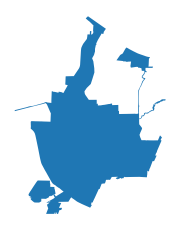

In [2]:
rochester_city = ox.geocode_to_gdf('Rochester, NY, USA')
ax = ox.project_gdf(rochester_city).plot()
_ = ax.axis('off')

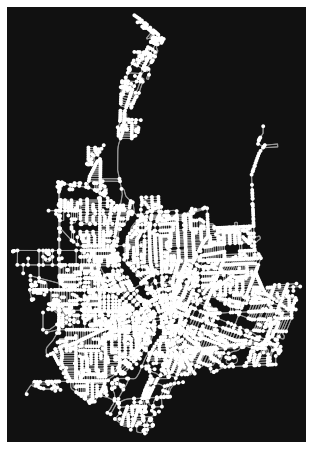

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
rochester_graph = ox.graph_from_place('Rochester, NY, USA', network_type='drive')
ox.plot_graph(rochester_graph)

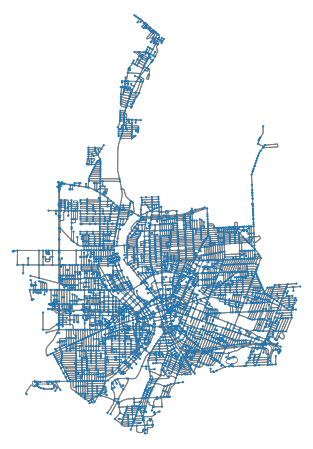

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(rochester_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)

In [5]:
# Sample bounding box in Rochester, NY - Plymouth exchange - Mayors Heights
north, south, east, west = 43.152740,43.15447,-77.605565,-77.602289

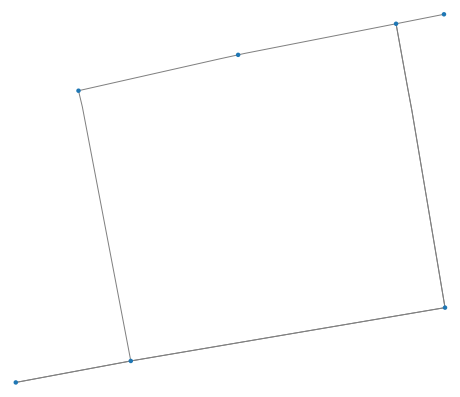

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
# create a network from the above bounded box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [7]:
#Number of nodes within the selected area
count=0
for i in G.nodes:
    count=count+1
print(count)

7


In [8]:
for i in G.nodes:
    print(i)

212714282
212714285
212719566
212745042
212890690
2201631380
5762705102


In [9]:
#Add locations to dataframe
Locations = []
for i in G.nodes:
    Locations.append(i)

In [10]:
Locations

[212714282, 212714285, 212719566, 212745042, 212890690, 2201631380, 5762705102]

In [11]:
roc_data = pd.DataFrame(Locations)
roc_data.rename(columns = {0:'Locations'}, inplace = True)
roc_data

,Locations
0,212714282
1,212714285
2,212719566
3,212745042
4,212890690
5,2201631380
6,5762705102


In [12]:
#Appending lats and longitudes
latitude = []
longitude = []
for i in Locations:
    latitude.append(G.nodes[i].get('y'))
    longitude.append(G.nodes[i].get('x'))

In [13]:
roc_data['Latitude'] = latitude
roc_data['Longitude'] = longitude

In [14]:
#Display the locations along with latitudes and longitudes in the dataframe
roc_data

,Locations,Latitude,Longitude
0,212714282,43.154102,-77.605117
1,212714285,43.152884,-77.604794
2,212719566,43.152787,-77.605505
3,212745042,43.153124,-77.602853
4,212890690,43.154404,-77.603155
5,2201631380,43.154446,-77.602859
6,5762705102,43.154263,-77.604131


In [15]:
#Converting the dataframe to a csv
roc_data.to_csv("BoxAreaRochester.csv")

In [16]:
roc_df = pd.read_csv("BoxAreaRochester.csv")

In [17]:
roc_df

,Unnamed: 0,Locations,Latitude,Longitude
0,0,212714282,43.154102,-77.605117
1,1,212714285,43.152884,-77.604794
2,2,212719566,43.152787,-77.605505
3,3,212745042,43.153124,-77.602853
4,4,212890690,43.154404,-77.603155
5,5,2201631380,43.154446,-77.602859
6,6,5762705102,43.154263,-77.604131


In [18]:
roc_df = roc_df.drop(['Locations'],axis=1)
roc_df.rename(columns = {'Latitude':'Left'}, inplace = True)
roc_df.rename(columns = {'Longitude':'Right'}, inplace = True)

In [19]:
roc_df

,Unnamed: 0,Left,Right
0,0,43.154102,-77.605117
1,1,43.152884,-77.604794
2,2,43.152787,-77.605505
3,3,43.153124,-77.602853
4,4,43.154404,-77.603155
5,5,43.154446,-77.602859
6,6,43.154263,-77.604131


In [20]:
import requests # to call the openmap/google apis -- OSRM for distances
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[0, "Right"]},{roc_df.loc[0, "Left"]};{roc_df.loc[6, "Right"]},{roc_df.loc[6, "Left"]}?overview=false""")

In [21]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"2Qizif___38AAAAAIwAAAAAAAAAAAAAAAAAAAMq5e0IAAAAAAAAAAAAAAAAjAAAAAAAAAAAAAADIRAAAA9df-7Z6kgID11_7tnqSAgAAfxWWLadt","distance":0,"location":[-77.605117,43.154102],"name":"South Clinton Avenue"},{"hint":"VQmzif___38AAAAAAwAAAAAAAAAXAAAAAAAAAHtMSkAAAAAA1vbPQQAAAAADAAAAAAAAABcAAADIRAAA3dpf-1h7kgLd2l_7WHuSAgAA3wSWLadt","distance":0,"location":[-77.604131,43.154264],"name":"Court Street"}],"routes":[{"legs":[{"steps":[],"weight":64.1,"distance":500.2,"summary":"","duration":64.1}],"weight_name":"routability","weight":64.1,"distance":500.2,"duration":64.1}]}'

In [22]:
import json
df3 = pd.DataFrame()
for j in roc_df.index:
    list1 = []
    for i in roc_df.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[j, "Right"]},{roc_df.loc[j, "Left"]};{roc_df.loc[i, "Right"]},{roc_df.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [23]:
json.loads(r.content)

{'code': 'Ok',
 'waypoints': [{'hint': 'VQmzif___38AAAAAAwAAAAAAAAAXAAAAAAAAAHtMSkAAAAAA1vbPQQAAAAADAAAAAAAAABcAAADIRAAA3dpf-1h7kgLd2l_7WHuSAgAA3wSWLadt',
   'distance': 0,
   'location': [-77.604131, 43.154264],
   'name': 'Court Street'},
  {'hint': 'VQmzif___38AAAAAAwAAAAAAAAAXAAAAAAAAAHtMSkAAAAAA1vbPQQAAAAADAAAAAAAAABcAAADIRAAA3dpf-1h7kgLd2l_7WHuSAgAA3wSWLadt',
   'distance': 0,
   'location': [-77.604131, 43.154264],
   'name': 'Court Street'}],
 'routes': [{'legs': [{'steps': [],
     'weight': 0,
     'distance': 0,
     'summary': '',
     'duration': 0}],
   'weight_name': 'routability',
   'weight': 0,
   'distance': 0,
   'duration': 0}]}

In [24]:
df3

,0,1,2,3,4,5,6
0,0.0,138.0,196.7,297.7,442.2,764.3,522.9
1,706.4,0.0,58.7,159.7,304.2,626.3,384.9
2,493.9,58.7,0.0,218.4,362.9,685.0,443.6
3,546.7,159.7,218.4,0.0,144.5,707.0,225.2
4,402.2,304.2,362.9,144.5,0.0,562.5,80.7
5,426.7,328.7,387.4,168.9,24.5,0.0,105.2
6,500.2,220.0,278.7,379.7,524.2,846.3,0.0


In [25]:
df = roc_df

In [26]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [27]:
df

,Unnamed: 0,Left,Right,coordinate,ID
0,0,43.154102,-77.605117,"(-77.6051173, 43.1541019)",0
1,1,43.152884,-77.604794,"(-77.6047942, 43.1528837)",1
2,2,43.152787,-77.605505,"(-77.6055048, 43.1527869)",2
3,3,43.153124,-77.602853,"(-77.6028527, 43.1531241)",3
4,4,43.154404,-77.603155,"(-77.6031552, 43.1544036)",4
5,5,43.154446,-77.602859,"(-77.6028591, 43.1544463)",5
6,6,43.154263,-77.604131,"(-77.604131, 43.1542635)",6


In [28]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-77.6051173, 43.1541019),
 1: (-77.6047942, 43.1528837),
 2: (-77.6055048, 43.1527869),
 3: (-77.6028527, 43.1531241),
 4: (-77.6031552, 43.1544036),
 5: (-77.6028591, 43.1544463),
 6: (-77.604131, 43.1542635)}

In [29]:
distances_df = df3
distances_df

,0,1,2,3,4,5,6
0,0.0,138.0,196.7,297.7,442.2,764.3,522.9
1,706.4,0.0,58.7,159.7,304.2,626.3,384.9
2,493.9,58.7,0.0,218.4,362.9,685.0,443.6
3,546.7,159.7,218.4,0.0,144.5,707.0,225.2
4,402.2,304.2,362.9,144.5,0.0,562.5,80.7
5,426.7,328.7,387.4,168.9,24.5,0.0,105.2
6,500.2,220.0,278.7,379.7,524.2,846.3,0.0


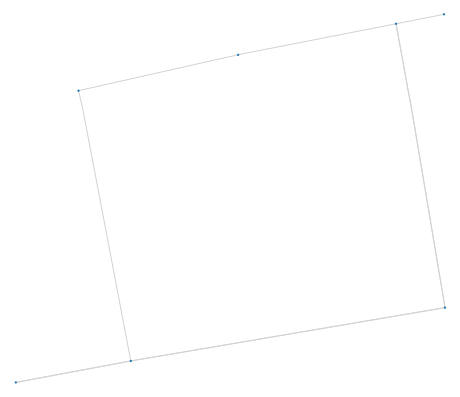

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [30]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

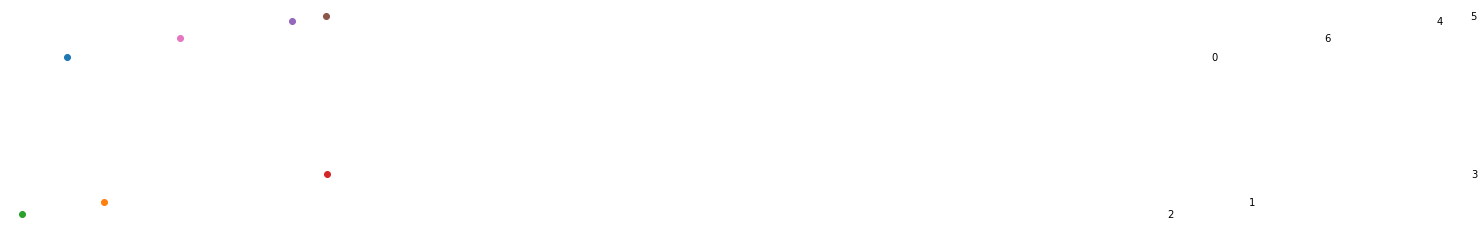

In [31]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [32]:
distance = distances_df

In [33]:
type(df.ID[0])

numpy.int64

In [34]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 138.0,
 (0, 2): 196.7,
 (0, 3): 297.7,
 (0, 4): 442.2,
 (0, 5): 764.3,
 (0, 6): 522.9,
 (1, 0): 706.4,
 (1, 2): 58.7,
 (1, 3): 159.7,
 (1, 4): 304.2,
 (1, 5): 626.3,
 (1, 6): 384.9,
 (2, 0): 493.9,
 (2, 1): 58.7,
 (2, 3): 218.4,
 (2, 4): 362.9,
 (2, 5): 685.0,
 (2, 6): 443.6,
 (3, 0): 546.7,
 (3, 1): 159.7,
 (3, 2): 218.4,
 (3, 4): 144.5,
 (3, 5): 707.0,
 (3, 6): 225.2,
 (4, 0): 402.2,
 (4, 1): 304.2,
 (4, 2): 362.9,
 (4, 3): 144.5,
 (4, 5): 562.5,
 (4, 6): 80.7,
 (5, 0): 426.7,
 (5, 1): 328.7,
 (5, 2): 387.4,
 (5, 3): 168.9,
 (5, 4): 24.5,
 (5, 6): 105.2,
 (6, 0): 500.2,
 (6, 1): 220.0,
 (6, 2): 278.7,
 (6, 3): 379.7,
 (6, 4): 524.2,
 (6, 5): 846.3}

In [64]:
V = 3 #the number vehicles/people deployed

In [65]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [66]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [67]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [68]:
#constraints
for v in df.ID:
    cap = 1 if v != 6 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 6 and j!= 6) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [69]:
%time prob.solve()
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/0af0d759733a40e1894b22c5970bf132-pulp.mps branch printingOptions all solution /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/0af0d759733a40e1894b22c5970bf132-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 49 COLUMNS
At line 362 RHS
At line 407 BOUNDS
At line 456 ENDATA
Problem MODEL has 44 rows, 48 columns and 174 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 2696.9 - 0.00 seconds
Cgl0004I processed model has 44 rows, 48 columns (48 integer (42 of which binary)) and 174 elements
Cutoff increment increased from 1e-05 to 0.0999
Cbc0038I Initial state - 11 integers unsatisfied sum - 2.14286
Cbc0038I Pass   1: suminf.    1.85714 (9) obj. 2783.81 iterations 4
Cbc0038I Pass   2: suminf. 

In [70]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [71]:
routes = get_next_loc(6)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=6:
        r.append(get_next_loc(r[-1][1])[-1])

In [72]:
routes

[[(6, 0), (0, 4), (4, 6)], [(6, 1), (1, 5), (5, 6)], [(6, 2), (2, 3), (3, 6)]]

In [73]:
routes1 = routes

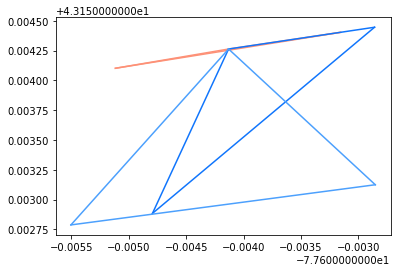

In [74]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

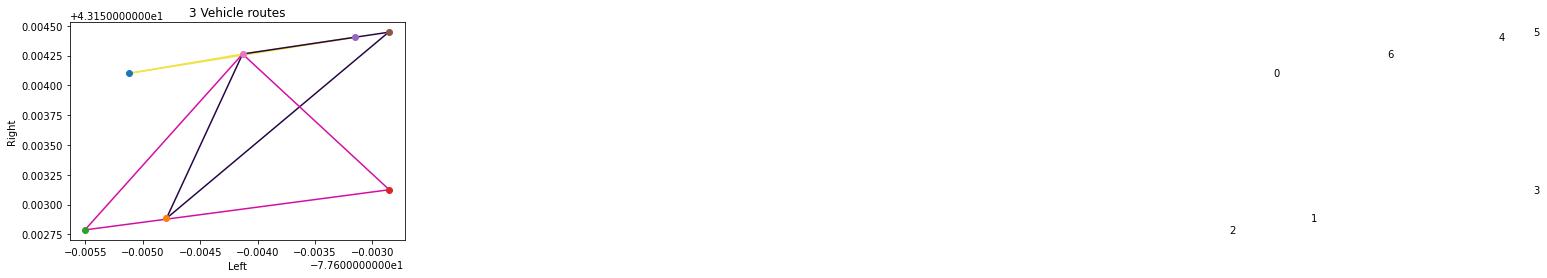

In [75]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()